In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Predict Price of Airline Tickets.csv")

# Data Set

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
print(data["Price"].mean())
print(data["Price"].median())
print(data["Price"].std())

9087.064120565385
8372.0
4611.3591668171175


# spliting

In [5]:
#24/03/2019
data.Date_of_Journey = data.Date_of_Journey.str.split('/')
data['Day_of_Journey'] = data.Date_of_Journey.str[0]
data['Month_of_Journey'] = data.Date_of_Journey.str[1]
data['Year_of_Journey'] = data.Date_of_Journey.str[2]

In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [7]:
data.Total_Stops.unique() # max # of stops =4 ->cities =6

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [8]:
#CCU ? IXR ? BBI ? BLR	
data.Route = data.Route.str.split('?')
data['City_1_Route'] =data.Route.str[0]
data['City_2_Route'] =data.Route.str[1]
data['City_3_Route'] =data.Route.str[2]
data['City_4_Route'] =data.Route.str[3]
data['City_5_Route'] =data.Route.str[4]
data['City_6_Route'] =data.Route.str[5]

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,City_4_Route,City_5_Route,City_6_Route
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN


In [10]:
#22:20
data.Dep_Time = data.Dep_Time.str.split(':')
data['Hour_Dep_Time'] = data.Dep_Time.str[0]
data['Minute_Dep_Time'] = data.Dep_Time.str[1]

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,City_4_Route,City_5_Route,City_6_Route,Hour_Dep_Time,Minute_Dep_Time
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",01:10 22 Mar,2h 50m,non-stop,No info,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",13:15,7h 25m,2 stops,No info,...,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",04:25 10 Jun,19h,2 stops,No info,...,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",23:30,5h 25m,1 stop,No info,...,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",21:35,4h 45m,1 stop,No info,...,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50


In [12]:
#01:10 22 Mar	
data.Arrival_Time = data.Arrival_Time.str.split(' ')
data['Arrival_Date'] = data.Arrival_Time.str[1]
data['Time_of_arrival'] = data.Arrival_Time.str[0]

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City_1_Route,City_2_Route,City_3_Route,City_4_Route,City_5_Route,City_6_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_arrival
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,...,BLR,DEL,NaN,NaN,NaN,NaN,22,20,22,01:10
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,...,CCU,IXR,BBI,BLR,NaN,NaN,05,50,NaN,13:15
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,...,DEL,LKO,BOM,COK,NaN,NaN,09,25,10,04:25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,...,CCU,NAG,BLR,NaN,NaN,NaN,18,05,NaN,23:30
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,...,BLR,NAG,DEL,NaN,NaN,NaN,16,50,NaN,21:35


In [14]:
#01:10
data.Time_of_arrival = data.Time_of_arrival.str.split(':')
data['Time_of_Arrival_Hour'] = data.Time_of_arrival.str[0]
data['Time_of_Arrival_Minute'] = data.Time_of_arrival.str[1]

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City_3_Route,City_4_Route,City_5_Route,City_6_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_arrival,Time_of_Arrival_Hour,Time_of_Arrival_Minute
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,...,NaN,NaN,NaN,NaN,22,20,22,"[01, 10]",01,10
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,...,BBI,BLR,NaN,NaN,05,50,NaN,"[13, 15]",13,15
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,...,BOM,COK,NaN,NaN,09,25,10,"[04, 25]",04,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,...,BLR,NaN,NaN,NaN,18,05,NaN,"[23, 30]",23,30
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,...,DEL,NaN,NaN,NaN,16,50,NaN,"[21, 35]",21,35


In [16]:
#2h 50m
data.Duration = data.Duration.str.split(' ')
data['Duration_Hour'] = data.Duration.str[0]
data.Duration_Hour = data.Duration_Hour.str.split('h')
data['Duration_Hour'] = data.Duration_Hour.str[0]
data['Duration_Minute'] = data.Duration.str[1]
data.Duration_Minute = data.Duration_Minute.str.split('m')
data['Duration_Minute'] = data.Duration_Minute.str[0]

In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City_5_Route,City_6_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_arrival,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",non-stop,No info,...,NaN,NaN,22,20,22,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2 stops,No info,...,NaN,NaN,05,50,NaN,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",[19h],2 stops,No info,...,NaN,NaN,09,25,10,"[04, 25]",04,25,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],"[5h, 25m]",1 stop,No info,...,NaN,NaN,18,05,NaN,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],"[4h, 45m]",1 stop,No info,...,NaN,NaN,16,50,NaN,"[21, 35]",21,35,4,45


In [18]:
# non stops == 0 stops same format 
data.Total_Stops.replace('non-stop','0',inplace=True)

In [19]:
data.Total_Stops

0              0
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
10678          0
10679          0
10680          0
10681          0
10682    2 stops
Name: Total_Stops, Length: 10683, dtype: object

In [20]:
#2 stops
data.Total_Stops = data.Total_Stops.str.split(' ')
data.Total_Stops = data.Total_Stops.str[0]

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City_5_Route,City_6_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_arrival,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",0,No info,...,NaN,NaN,22,20,22,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2,No info,...,NaN,NaN,05,50,NaN,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",[19h],2,No info,...,NaN,NaN,09,25,10,"[04, 25]",04,25,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],"[5h, 25m]",1,No info,...,NaN,NaN,18,05,NaN,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],"[4h, 45m]",1,No info,...,NaN,NaN,16,50,NaN,"[21, 35]",21,35,4,45


In [22]:

data.Additional_Info.unique() # No info ==No Info

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [23]:
#same format ->(No Info)-<
data.Additional_Info.replace('No info','No Info',inplace=True)

In [24]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City_5_Route,City_6_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_arrival,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",0,No Info,...,NaN,NaN,22,20,22,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2,No Info,...,NaN,NaN,05,50,NaN,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",[19h],2,No Info,...,NaN,NaN,09,25,10,"[04, 25]",04,25,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],"[5h, 25m]",1,No Info,...,NaN,NaN,18,05,NaN,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],"[4h, 45m]",1,No Info,...,NaN,NaN,16,50,NaN,"[21, 35]",21,35,4,45


In [25]:
data.isnull().sum()

Airline                       0
Date_of_Journey               0
Source                        0
Destination                   0
Route                         1
Dep_Time                      0
Arrival_Time                  0
Duration                      0
Total_Stops                   1
Additional_Info               0
Price                         0
Day_of_Journey                0
Month_of_Journey              0
Year_of_Journey               0
City_1_Route                  1
City_2_Route                  1
City_3_Route               3492
City_4_Route               9117
City_5_Route              10637
City_6_Route              10682
Hour_Dep_Time                 0
Minute_Dep_Time               0
Arrival_Date               6348
Time_of_arrival               0
Time_of_Arrival_Hour          0
Time_of_Arrival_Minute        0
Duration_Hour                 0
Duration_Minute            1032
dtype: int64

# Drop old Cols with mix data & city5,6 since majority of the data in these columns was NaN 

In [26]:
data.drop('Date_of_Journey',axis=1,inplace=True)
data.drop('Route',axis=1,inplace=True)
data.drop('Duration',axis=1,inplace=True)
data.drop('Dep_Time',axis=1,inplace=True)
data.drop('Arrival_Time',axis=1,inplace=True)
data.drop('City_5_Route',axis=1,inplace=True)
data.drop('City_6_Route',axis=1,inplace=True)
data.drop('City_4_Route',axis=1,inplace=True) ##City_4_Route 9117NUll
data.drop('Time_of_arrival',axis=1,inplace=True)

In [27]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No Info,3897,24,03,2019,BLR,DEL,NaN,22,20,22,01,10,2,50
1,Air India,Kolkata,Banglore,2,No Info,7662,1,05,2019,CCU,IXR,BBI,05,50,NaN,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No Info,13882,9,06,2019,DEL,LKO,BOM,09,25,10,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,No Info,6218,12,05,2019,CCU,NAG,BLR,18,05,NaN,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No Info,13302,01,03,2019,BLR,NAG,DEL,16,50,NaN,21,35,4,45


In [28]:
# check num of missing values 
data.isnull().sum()

Airline                      0
Source                       0
Destination                  0
Total_Stops                  1
Additional_Info              0
Price                        0
Day_of_Journey               0
Month_of_Journey             0
Year_of_Journey              0
City_1_Route                 1
City_2_Route                 1
City_3_Route              3492
Hour_Dep_Time                0
Minute_Dep_Time              0
Arrival_Date              6348
Time_of_Arrival_Hour         0
Time_of_Arrival_Minute       0
Duration_Hour                0
Duration_Minute           1032
dtype: int64

# Replace missing values

In [29]:
data[data['City_1_Route'].isnull()] # row num :9041 in dataframe -1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
9039,Air India,Delhi,Cochin,NaN,No Info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09,25,23,40


In [30]:
df = pd.DataFrame(data)
iindex = df.index[(df['Total_Stops'].isnull())&(df['Price']==7480)&(df['City_1_Route'].isnull())&(df['City_2_Route'].isnull())]
print(iindex)

Int64Index([9039], dtype='int64')


In [31]:
#replace 'City' 1 in this row as NAWA and ‘City2’ as SHABIN. We replace ‘Total_stops’ as 0
data.at[9039, 'City_1_Route'] = 'Nawa'
data.at[9039, 'City_2_Route'] = 'Shabin'
data.at[9039, 'Total_Stops'] = '0'

In [32]:
#check updates 
data[data['City_1_Route']=='Nawa']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
9039,Air India,Delhi,Cochin,0,No Info,7480,6,05,2019,Nawa,Shabin,NaN,09,45,07,09,25,23,40


In [33]:
data.isnull().sum()

Airline                      0
Source                       0
Destination                  0
Total_Stops                  0
Additional_Info              0
Price                        0
Day_of_Journey               0
Month_of_Journey             0
Year_of_Journey              0
City_1_Route                 0
City_2_Route                 0
City_3_Route              3492
Hour_Dep_Time                0
Minute_Dep_Time              0
Arrival_Date              6348
Time_of_Arrival_Hour         0
Time_of_Arrival_Minute       0
Duration_Hour                0
Duration_Minute           1032
dtype: int64

In [34]:
data['City_3_Route'].fillna('None',inplace=True) #3492 Nan ->none
data['Duration_Minute'].fillna('0',inplace=True) # 1032
#missing values are those values where the flight took off and landed on the same date.
data['Arrival_Date'].fillna(data['Day_of_Journey'],inplace=True) # 6348

In [35]:
data.isnull().sum()

Airline                   0
Source                    0
Destination               0
Total_Stops               0
Additional_Info           0
Price                     0
Day_of_Journey            0
Month_of_Journey          0
Year_of_Journey           0
City_1_Route              0
City_2_Route              0
City_3_Route              0
Hour_Dep_Time             0
Minute_Dep_Time           0
Arrival_Date              0
Time_of_Arrival_Hour      0
Time_of_Arrival_Minute    0
Duration_Hour             0
Duration_Minute           0
dtype: int64

# الحمد لله قدر و لطف 

In [36]:
#data type found object for numerical column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 10683 non-null  object
 1   Source                  10683 non-null  object
 2   Destination             10683 non-null  object
 3   Total_Stops             10683 non-null  object
 4   Additional_Info         10683 non-null  object
 5   Price                   10683 non-null  int64 
 6   Day_of_Journey          10683 non-null  object
 7   Month_of_Journey        10683 non-null  object
 8   Year_of_Journey         10683 non-null  object
 9   City_1_Route            10683 non-null  object
 10  City_2_Route            10683 non-null  object
 11  City_3_Route            10683 non-null  object
 12  Hour_Dep_Time           10683 non-null  object
 13  Minute_Dep_Time         10683 non-null  object
 14  Arrival_Date            10683 non-null  object
 15  Ti

# Change Data Type

In [37]:
data.Day_of_Journey = data.Day_of_Journey.astype('int64')
data.Month_of_Journey = data.Month_of_Journey.astype('int64')
data.Year_of_Journey = data.Year_of_Journey.astype('int64')

In [38]:
data.Total_Stops = data.Total_Stops.astype('int64') 

In [39]:
data.Hour_Dep_Time = data.Hour_Dep_Time.astype('int64')
data.Minute_Dep_Time = data.Minute_Dep_Time.astype('int64')

In [40]:
data.Arrival_Date = data.Arrival_Date.astype('int64')

In [41]:
data.Time_of_Arrival_Hour = data.Time_of_Arrival_Hour.astype('int64') 
data.Time_of_Arrival_Minute = data.Time_of_Arrival_Minute.astype('int64') 

In [42]:
data[data['Duration_Hour']=='5m'] #dataframe row # 6476-1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
6474,Air India,Mumbai,Hyderabad,2,No Info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [43]:
#determine index of this row 
df = pd.DataFrame(data)
iindex = df.index[df['Duration_Hour']=='5m'][0]
print(iindex)

6474


In [44]:
# drop row with incorrect data
data.drop(index=6474,inplace=True,axis=0)

In [45]:
data.Duration_Hour = data.Duration_Hour.astype('int64') #5m

In [46]:
data.Duration_Minute = data.Duration_Minute.astype('int64')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 10682 non-null  object
 1   Source                  10682 non-null  object
 2   Destination             10682 non-null  object
 3   Total_Stops             10682 non-null  int64 
 4   Additional_Info         10682 non-null  object
 5   Price                   10682 non-null  int64 
 6   Day_of_Journey          10682 non-null  int64 
 7   Month_of_Journey        10682 non-null  int64 
 8   Year_of_Journey         10682 non-null  int64 
 9   City_1_Route            10682 non-null  object
 10  City_2_Route            10682 non-null  object
 11  City_3_Route            10682 non-null  object
 12  Hour_Dep_Time           10682 non-null  int64 
 13  Minute_Dep_Time         10682 non-null  int64 
 14  Arrival_Date            10682 non-null  int64 
 15  Ti

# Data Visualization

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

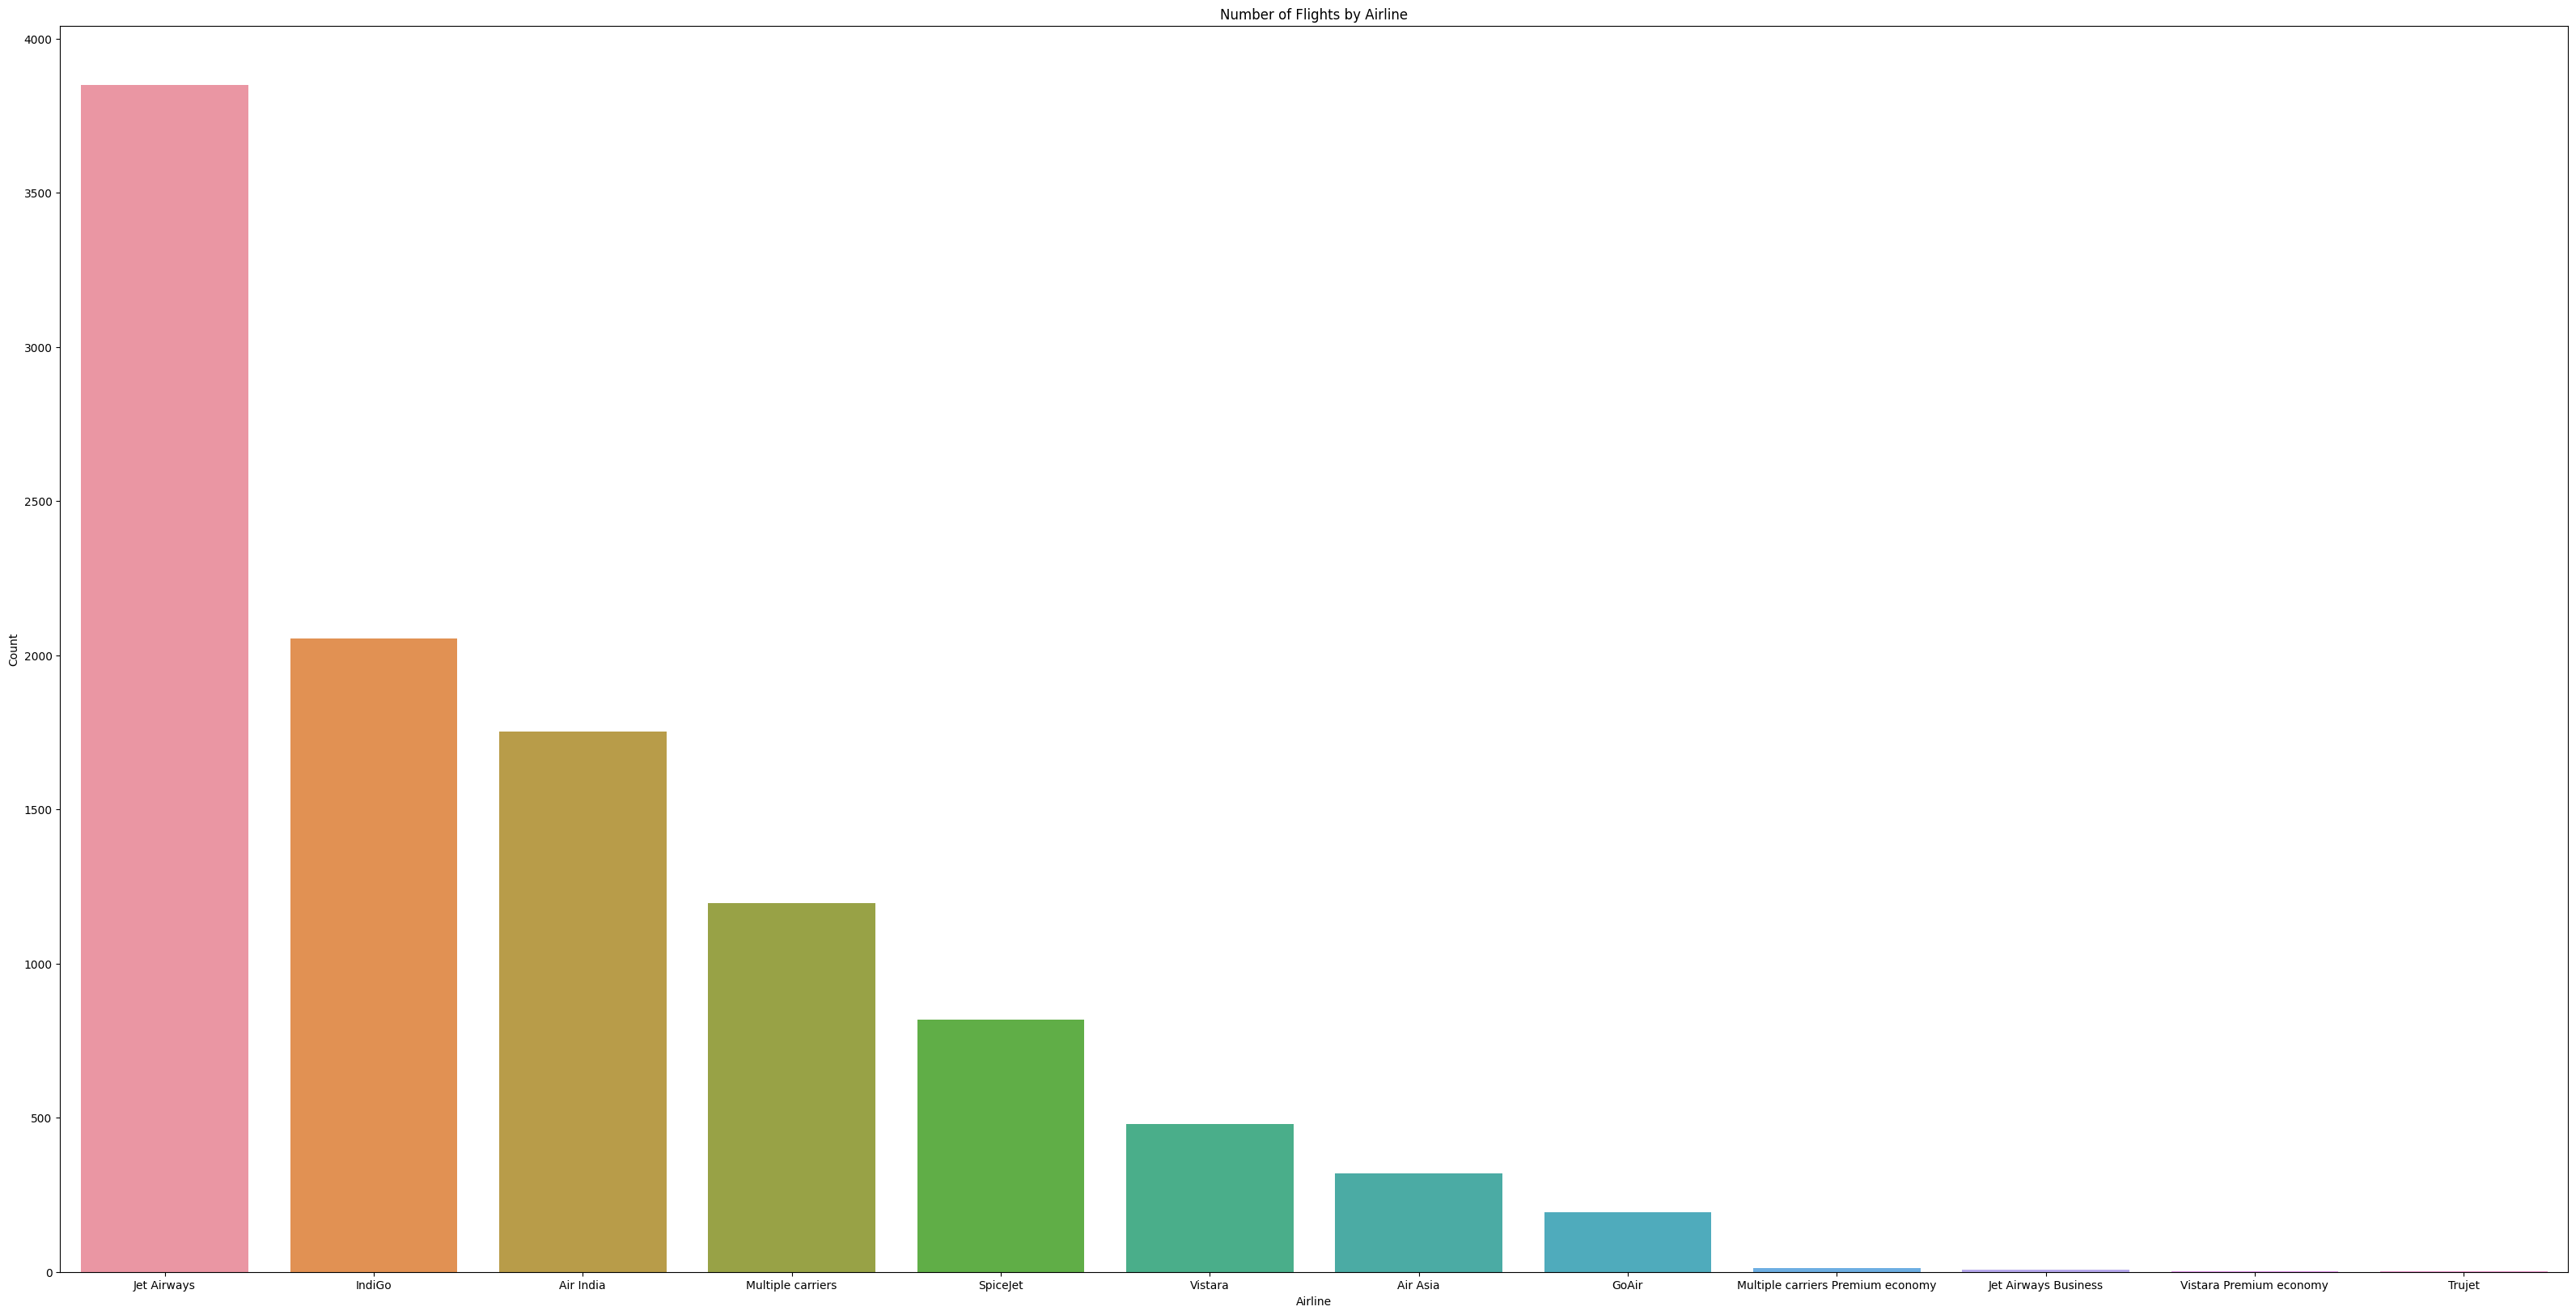

In [49]:
# Bar chart for Airline
airline_count = df['Airline'].value_counts()
plt.figure(figsize=(40,20))
sns.barplot(x=airline_count.index, y=airline_count.values)
plt.title("Number of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.show()
#Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.

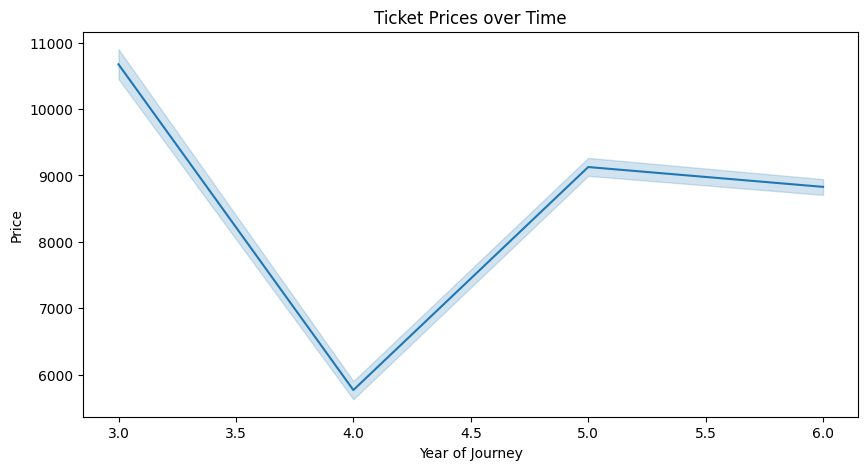

In [50]:
# Line chart for Date_of_Journey
plt.figure(figsize=(10,5))
sns.lineplot(x="Month_of_Journey", y="Price", data=df)
plt.title("Ticket Prices over Time")
plt.xlabel("Month of Journey")
plt.ylabel("Price")
plt.show()

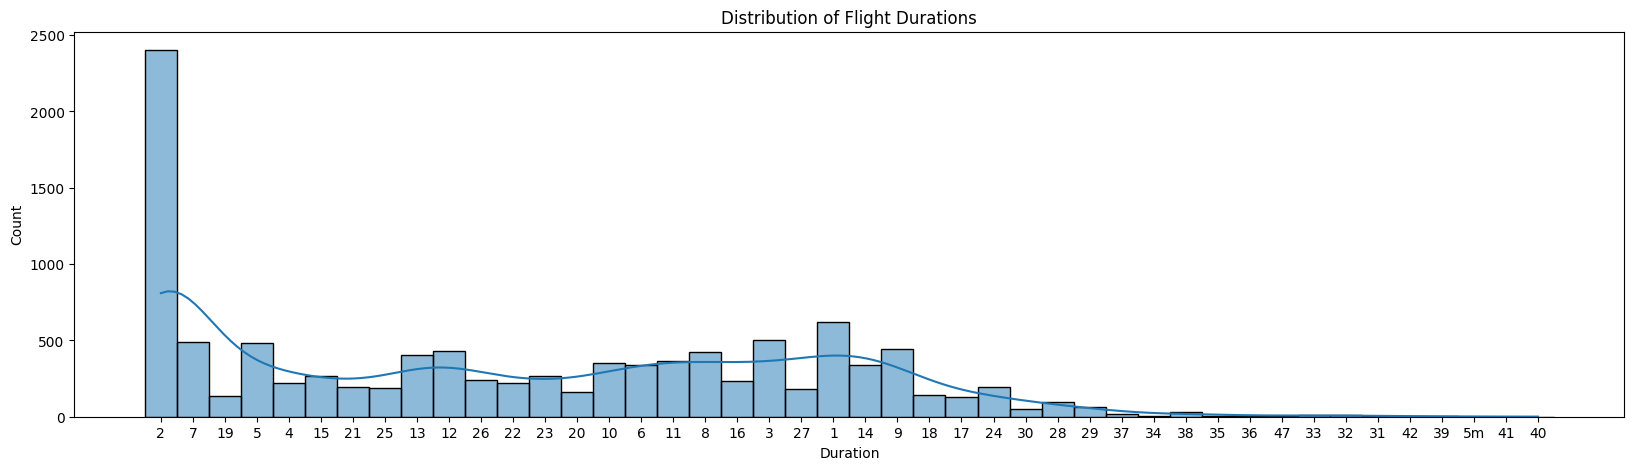

In [51]:
# Histogram for Duration
plt.figure(figsize=(20,5))
sns.histplot(df['Duration_Hour'], bins=50, kde=True)
plt.title("Distribution of Flight Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

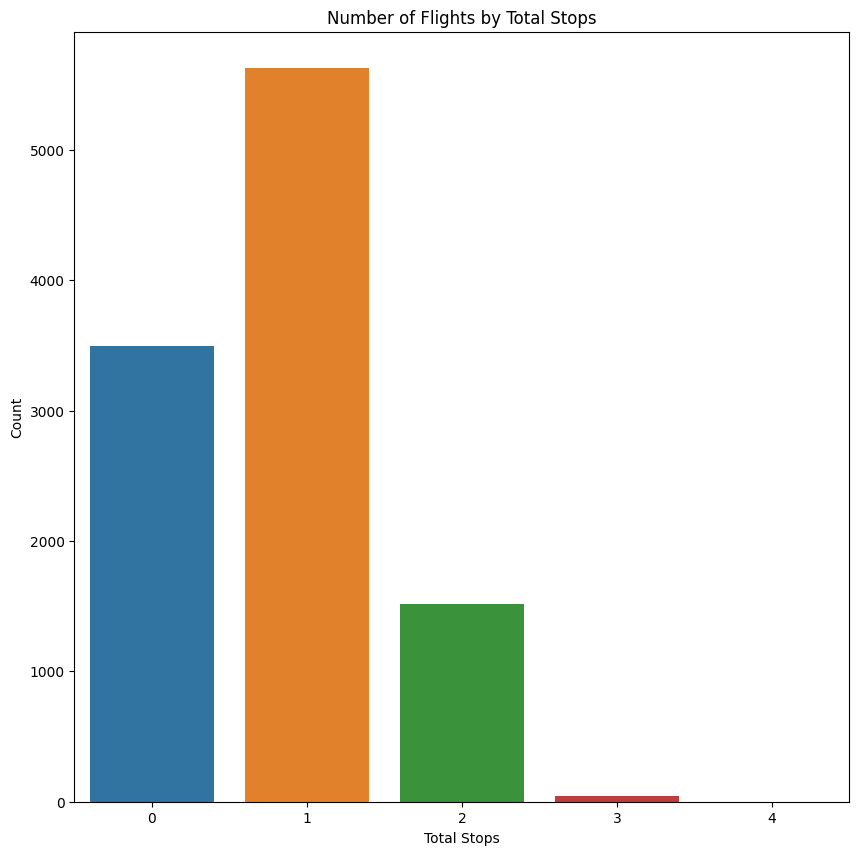

In [52]:
# Bar chart for Total_Stops
stop_count = df['Total_Stops'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=stop_count.index, y=stop_count.values)
plt.title("Number of Flights by Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.show()

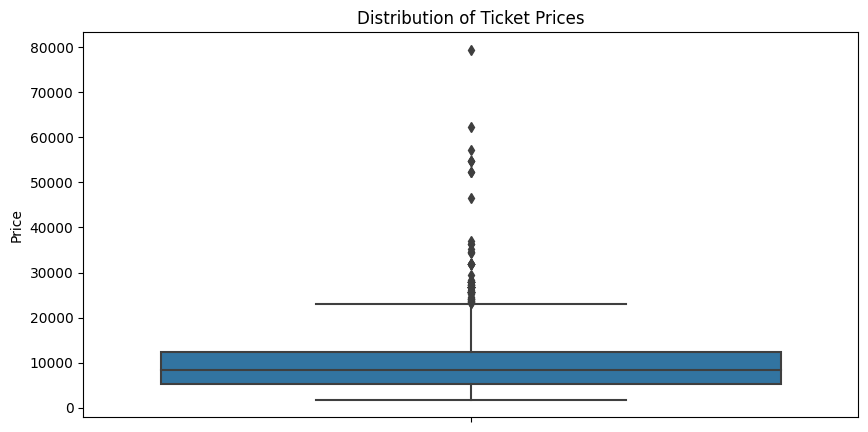

In [53]:
# Box plot for Price
plt.figure(figsize=(10,5))
sns.boxplot(y="Price", data=df)
plt.title("Distribution of Ticket Prices")
plt.ylabel("Price")
plt.show()

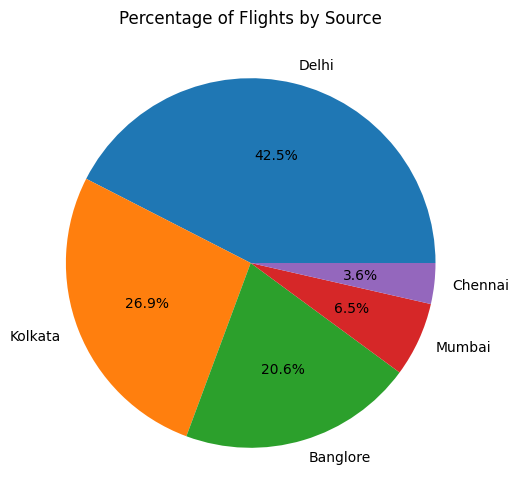

In [54]:
# Pie chart for Source
source_count = df['Source'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(source_count.values, labels=source_count.index, autopct='%1.1f%%')
plt.title("Percentage of Flights by Source")
plt.show()

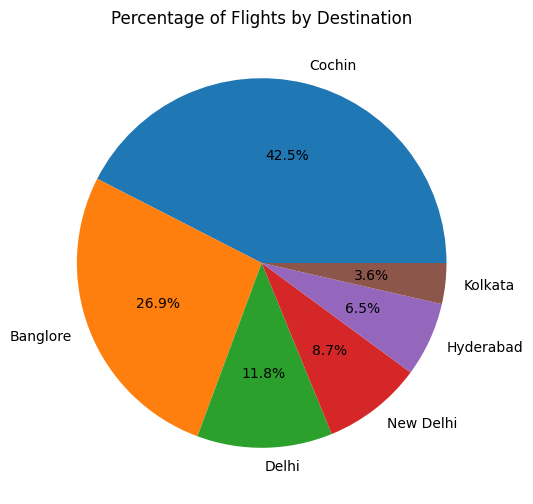

In [55]:
# Pie chart for Destination
dest_count = df['Destination'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dest_count.values, labels=dest_count.index, autopct='%1.1f%%')
plt.title("Percentage of Flights by Destination")
plt.show()

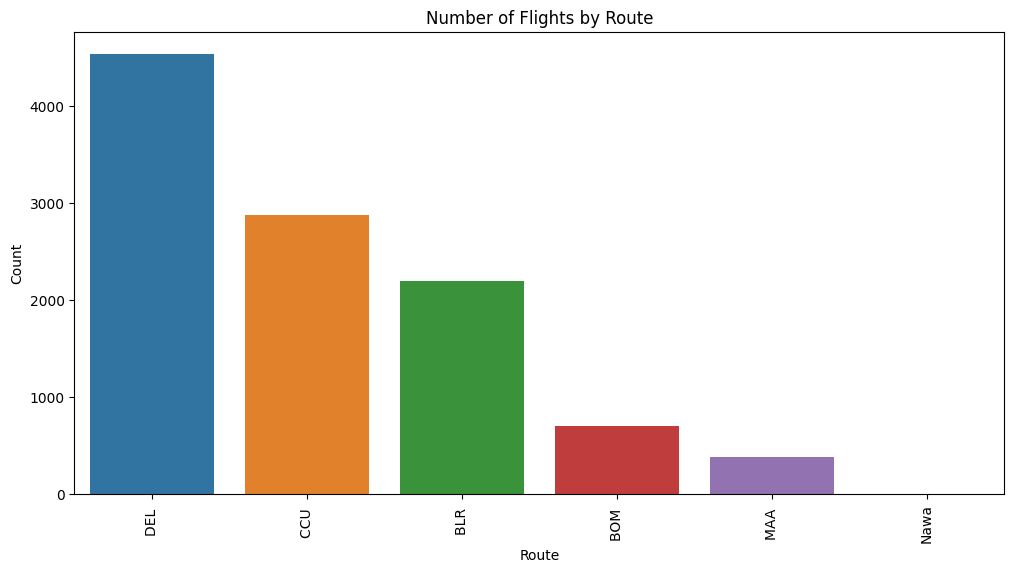

In [56]:
# Bar chart for Route
route_count = df['City_1_Route'].value_counts()[:20]
plt.figure(figsize=(12,6))
sns.barplot(x=route_count.index, y=route_count.values)
plt.title("Number of Flights by Route")
plt.xlabel("Route")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Encoding categorical data

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
label_encoder = LabelEncoder()

In [59]:
for x in data.columns:
    if(data[x].dtypes=='object'):
         print(x)
         data[x] = label_encoder.fit_transform(data[x])

Airline
Source
Destination
Additional_Info
City_1_Route
City_2_Route
City_3_Route


In [60]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
0,3,0,5,0,6,3897,24,3,2019,0,13,29,22,20,22,1,10,2,50
1,1,3,0,2,6,7662,1,5,2019,2,25,1,5,50,1,13,15,7,25
2,4,2,1,2,6,13882,9,6,2019,3,32,4,9,25,10,4,25,19,0
3,3,3,0,1,6,6218,12,5,2019,2,34,3,18,5,12,23,30,5,25
4,3,0,5,1,6,13302,1,3,2019,0,34,8,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,6,4107,9,4,2019,2,5,29,19,55,9,22,25,2,30
10679,1,3,0,0,6,4145,27,4,2019,2,5,29,20,45,27,23,20,2,35
10680,4,0,2,0,6,7229,27,4,2019,0,13,29,8,20,27,11,20,3,0
10681,10,0,5,0,6,12648,1,3,2019,0,13,29,11,30,1,14,10,2,40


# Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
#the values will be scaled to have a mean of 0 and a standard deviation of 1. 
standard_scaler = StandardScaler()

In [63]:
datta = data.drop("Price",axis=1)
y = data["Price"]

In [64]:
Data = standard_scaler.fit_transform(datta)
x = pd.DataFrame(Data,columns=datta.columns)

In [65]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,City_1_Route,City_2_Route,City_3_Route,Hour_Dep_Time,Minute_Dep_Time,Arrival_Date,Time_of_Arrival_Hour,Time_of_Arrival_Minute,Duration_Hour,Duration_Minute
0,-0.410805,-1.658435,2.416778,-1.220477,0.331448,1.237288,-1.467707,0.0,-1.674078,0.137204,1.395015,1.654268,-0.234932,0.955750,-1.800319,-0.889984,-0.970831,1.278932
1,-1.261152,0.890299,-0.973732,1.741835,0.331448,-1.475307,0.250153,0.0,-0.016372,1.634890,-1.082280,-1.303000,1.363674,-1.524648,-0.050813,-0.587017,-0.382238,-0.196525
2,0.014369,0.040721,-0.295630,1.741835,0.331448,-0.531796,1.109082,0.0,0.812481,2.508541,-0.816856,-0.607172,0.031502,-0.461621,-1.362943,0.018918,1.030385,-1.671983
3,-0.410805,0.890299,-0.973732,0.260679,0.331448,-0.177979,0.250153,0.0,-0.016372,2.758155,-0.905330,0.958440,-1.034235,-0.225392,1.407109,0.321885,-0.617675,-0.196525
4,-0.410805,-1.658435,2.416778,0.260679,0.331448,-1.475307,-1.467707,0.0,-1.674078,2.758155,-0.462956,0.610527,1.363674,-1.524648,1.115525,0.624852,-0.735394,0.983841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220477,0.331448,-0.531796,-0.608777,0.0,-0.016372,-0.861254,1.395015,1.132397,1.630108,-0.579735,1.261317,0.018918,-0.970831,0.098566
10678,-1.261152,0.890299,-0.973732,-1.220477,0.331448,1.591104,-0.608777,0.0,-0.016372,-0.861254,1.395015,1.306354,1.097240,1.546321,1.407109,-0.284050,-0.970831,0.393658
10679,0.014369,-1.658435,0.382472,-1.220477,0.331448,1.591104,-0.608777,0.0,-1.674078,0.137204,1.395015,-0.781129,-0.234932,1.546321,-0.342397,-0.284050,-0.853113,-1.671983
10680,2.565411,-1.658435,2.416778,-1.220477,0.331448,-1.475307,-1.467707,0.0,-1.674078,0.137204,1.395015,-0.259258,0.297937,-1.524648,0.094979,-0.889984,-0.970831,0.688749


# 1 LinearRegression Model

In [66]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [67]:
#random_state -->controls the shuffling process.
# 80 train 20 test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
ridge = Ridge()
# Getting a range of 100 numbers between 0.0001 and 10000 for alpha
alphas = np.logspace(-4, 4, 100)
params = {'alpha': alphas}

In [69]:
# performing grid_search for the best alpha value for the model
# cv (Cross Validation) is commonly assigned with 5 or 10
grid_search = GridSearchCV(ridge, params, cv=5)

grid_search.fit(x_train, y_train)

y_train_pred = grid_search.predict(x_train)

y_test_pred = grid_search.predict(x_test)

In [70]:
# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)

r2=r2_score(y_train, y_train_pred)
print("Train R Squared:", r2)

r2=r2_score(y_test, y_test_pred)
print("Test R Squared:", r2)

mae = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae)

mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", mae)

mape = mean_absolute_percentage_error(y_train, y_train_pred)
print("Train Mape:", mape)

mape = mean_absolute_percentage_error(y_test, y_test_pred)
print("Test Mape:", mape)

Best parameters:  {'alpha': 54.62277217684348}
Train R Squared: 0.5008088215112905
Test R Squared: 0.4810782434638432
Train MAE: 2287.0677021876154
Test MAE: 2347.4795325340733
Train Mape: 0.28639668360893455
Test Mape: 0.28815677320712946


# 2 RandomForestRegressor Model

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [73]:
# creating range of parameters to tune the model

# range for n_estimators (no. of used desecion trees in the model) values
n_estimators = np.arange(25, 225, 25)

# range for min_samples_split (the minimum number of samples required to split an internal node) values
min_samples_splits = [1, 2, 3, 4]

# range for min_samples_leaf (minimum number of samples required to be at a leaf node) values
min_samples_leaf = [1, 2, 3]

param_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_splits,
    'min_samples_leaf': min_samples_leaf }


In [74]:
# Aplying GridSearch on the model to get the best accuracy based on parameters added
# cv (Cross Validation) is commonly assigned with 5 or 10
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(x_train, y_train)

y_train_pred = grid_search.predict(x_train)

y_test_pred = grid_search.predict(x_test)

C:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ba

In [75]:
# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)

r2 = r2_score(y_train, y_train_pred)
print("Train R Squared:", r2)

r2 = r2_score(y_test, y_test_pred)
print("Test R Squared:", r2)

mae = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae)

mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", mae)

mape = mean_absolute_percentage_error(y_train, y_train_pred)
print("Train Mape:", mape)

mape = mean_absolute_percentage_error(y_test, y_test_pred)
print("Test Mape:", mape)
# As a general rule of thumb, a MAPE value below 10% is often considered good in many industries.......

Best parameters:  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Train R Squared: 0.9761083454386393
Test R Squared: 0.8946200827333258
Train MAE: 268.6386260191145
Test MAE: 662.1791922142746
Train Mape: 0.02997744908865456
Test Mape: 0.07634604222433507


# 3 KNeighborsRegressor Model

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
# creating range of parameters to tune the model
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [78]:
# Aplying GridSearch on the model to get the best accuracy based on parameters added
# cv (Cross Validation) is commonly assigned with 5 or 10

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(x_train, y_train)

y_train_pred = grid_search.predict(x_train)

y_test_pred = grid_search.predict(x_test)

In [79]:
# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)

r2 = r2_score(y_train, y_train_pred)
print("Train R Squared:", r2)

r2 = r2_score(y_test, y_test_pred)
print("Test R Squared:", r2)

mae = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae)

mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", mae)

mape = mean_absolute_percentage_error(y_train, y_train_pred)
print("Train Mape:", mape)

mape = mean_absolute_percentage_error(y_test, y_test_pred)
print("Test Mape:", mape)
# As a general rule of thumb, a MAPE value below 10% is often considered good in many industries.......

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Train R Squared: 0.9962635222688683
Test R Squared: 0.8109215060655371
Train MAE: 36.59196411156621
Test MAE: 1032.754853710341
Train Mape: 0.0040607968936284605
Test Mape: 0.11845813309456572
